In [1]:
import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info
import numpy as np

from learnMSA.msa_hmm import Align, Configuration, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset
from learnMSA.protein_language_models import Common, EmbeddingBatchGenerator

2025-10-27 14:50:31.851340: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761573031.869103 1804788 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761573031.874372 1804788 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761573031.888977 1804788 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761573031.889002 1804788 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761573031.889003 1804788 computation_placer.cc:177] computation placer alr


# Experimental demo: learnMSA + protein language model

This notebook demonstrates how to align a set of protein sequences with learnMSA supported by a large, pre-trained protein language model.

This configuration of learnMSA is the most accurate variant of learnMSA currently available. It is also the most computationally expensive. It is recommended to run this notebook on a GPU.

In [5]:
# Your fasta file to align.
train_filename = "../tests/data/egf.fasta"

# The number of independently trained models.
num_models = 4

In [6]:
os.makedirs("tmp", exist_ok = True)

Training of 4 models on file egf.fasta
Configuration: 
{
num_models : 4
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=10000

/home/felix/miniforge3/envs/learnMSAdev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Computing all embeddings (this may take a while).
10% done.
20% done.
30% done.
40% done.
50% done.
60% done.
70% done.
80% done.
90% done.
100% done.
Fitting models of lengths [23 25 26 25] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using 1 GPUs.


I0000 00:00:1761573131.224581 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1761573133.487404 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761573151.703701 1804957 cuda_solvers.cc:175] Creating GpuSolver handles for stream 0x580b30d8ef40


46/46 - 24s - 517ms/step - aux_loss: 0.0000e+00 - loglik: -9.2597e+01 - loss: 108.7370 - prior: -1.6140e+01
Epoch 2/10
46/46 - 4s - 98ms/step - aux_loss: 0.0000e+00 - loglik: -6.9424e+01 - loss: 73.5935 - prior: -4.1697e+00
Epoch 3/10
46/46 - 5s - 98ms/step - aux_loss: 0.0000e+00 - loglik: -6.7953e+01 - loss: 70.7430 - prior: -2.7896e+00
Epoch 4/10
46/46 - 5s - 99ms/step - aux_loss: 0.0000e+00 - loglik: -6.7693e+01 - loss: 69.9997 - prior: -2.3069e+00
Epoch 5/10
46/46 - 5s - 99ms/step - aux_loss: 0.0000e+00 - loglik: -6.7650e+01 - loss: 69.7736 - prior: -2.1239e+00
Epoch 6/10
46/46 - 5s - 100ms/step - aux_loss: 0.0000e+00 - loglik: -6.7597e+01 - loss: 69.6368 - prior: -2.0399e+00
Epoch 7/10
46/46 - 5s - 101ms/step - aux_loss: 0.0000e+00 - loglik: -6.7529e+01 - loss: 69.5159 - prior: -1.9867e+00
Epoch 8/10
46/46 - 5s - 101ms/step - aux_loss: 0.0000e+00 - loglik: -6.7540e+01 - loss: 69.4938 - prior: -1.9534e+00
Epoch 9/10
46/46 - 5s - 98ms/step - aux_loss: 0.0000e+00 - loglik: -6.7429e+0

I0000 00:00:1761573200.558203 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


expansions model 0: [(12, 9)]
discards model 0: []
expansions model 1: [(12, 2), (13, 3), (14, 1), (17, 1), (19, 2)]
discards model 1: []
expansions model 2: [(12, 2), (13, 3), (16, 1), (17, 1)]
discards model 2: []
expansions model 3: [(12, 2), (13, 3), (14, 1), (15, 1), (16, 1)]
discards model 3: []
Re-initialized the encoder parameters.
Fitting models of lengths [32, 34, 33, 33] on 7774 sequences.
Batch size= 190 Learning rate= 0.05
Using sequence weights  [1.         0.33333334 0.05882353 ... 0.05555556 0.03030303 0.25      ] .
1 sequences are longer than 65 and will be cropped for training.
To disable cropping, use --crop disable. To change the cropping limit to X, use --crop X.
Using 1 GPUs.


I0000 00:00:1761573206.760900 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/20


I0000 00:00:1761573208.685141 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


46/46 - 22s - 487ms/step - aux_loss: 0.0000e+00 - loglik: -6.3007e+01 - loss: 76.8807 - prior: -1.3874e+01
Epoch 2/20
46/46 - 5s - 100ms/step - aux_loss: 0.0000e+00 - loglik: -6.0958e+01 - loss: 64.4787 - prior: -3.5212e+00
Epoch 3/20
46/46 - 5s - 99ms/step - aux_loss: 0.0000e+00 - loglik: -6.1420e+01 - loss: 63.5745 - prior: -2.1541e+00
Epoch 4/20
46/46 - 5s - 99ms/step - aux_loss: 0.0000e+00 - loglik: -6.1700e+01 - loss: 63.3925 - prior: -1.6921e+00
Epoch 5/20
46/46 - 5s - 100ms/step - aux_loss: 0.0000e+00 - loglik: -6.1399e+01 - loss: 62.9214 - prior: -1.5220e+00
Epoch 6/20
46/46 - 5s - 102ms/step - aux_loss: 0.0000e+00 - loglik: -6.1346e+01 - loss: 62.7617 - prior: -1.4153e+00
Epoch 7/20
46/46 - 5s - 98ms/step - aux_loss: 0.0000e+00 - loglik: -6.1351e+01 - loss: 62.6978 - prior: -1.3469e+00
Epoch 8/20
46/46 - 5s - 100ms/step - aux_loss: 0.0000e+00 - loglik: -6.1340e+01 - loss: 62.6361 - prior: -1.2957e+00
Epoch 9/20
46/46 - 5s - 99ms/step - aux_loss: 0.0000e+00 - loglik: -6.1340e+0

I0000 00:00:1761573286.852700 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Aligning 2 insertion slices with famsa.
time for generating output: 4.0649
Wrote file tmp/interactive2.alignment.fasta
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step
>l=-53.25_t=0.01
.....................$CD........P............NP........CYN.HG..T..CS......................L......RA......-....TGYTCSCL....PR......Y....T...GEH$..........................
>l=-57.35_t=0.01
.....................$CD........S............QP........CRN.-G..T..CSl.....................N......TN......-....TDYTCACF....PG......Y....T...GRY$..........................
>l=-48.86_t=0.01
.....................$CD........S............DP........CLN.GG..T..CT......................L......RS......L....DSYSCACA....PG......Y....T...GQH$..........................
>l=-63.30_t=0.01
.....................$CD........H............VT........CLN.GG..T..CQ......................L......KT......L....EDYTCACA....NG......Y....T...GER$..........................
>l=-64.01_t=0.01
.....................$CD........H............VT........CLN.GG..T..CQ........

I0000 00:00:1761573295.881591 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761573296.117061 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761573296.287704 1804788 gpu_device.cc:2019] Created device /device:GPU:0 with 22149 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


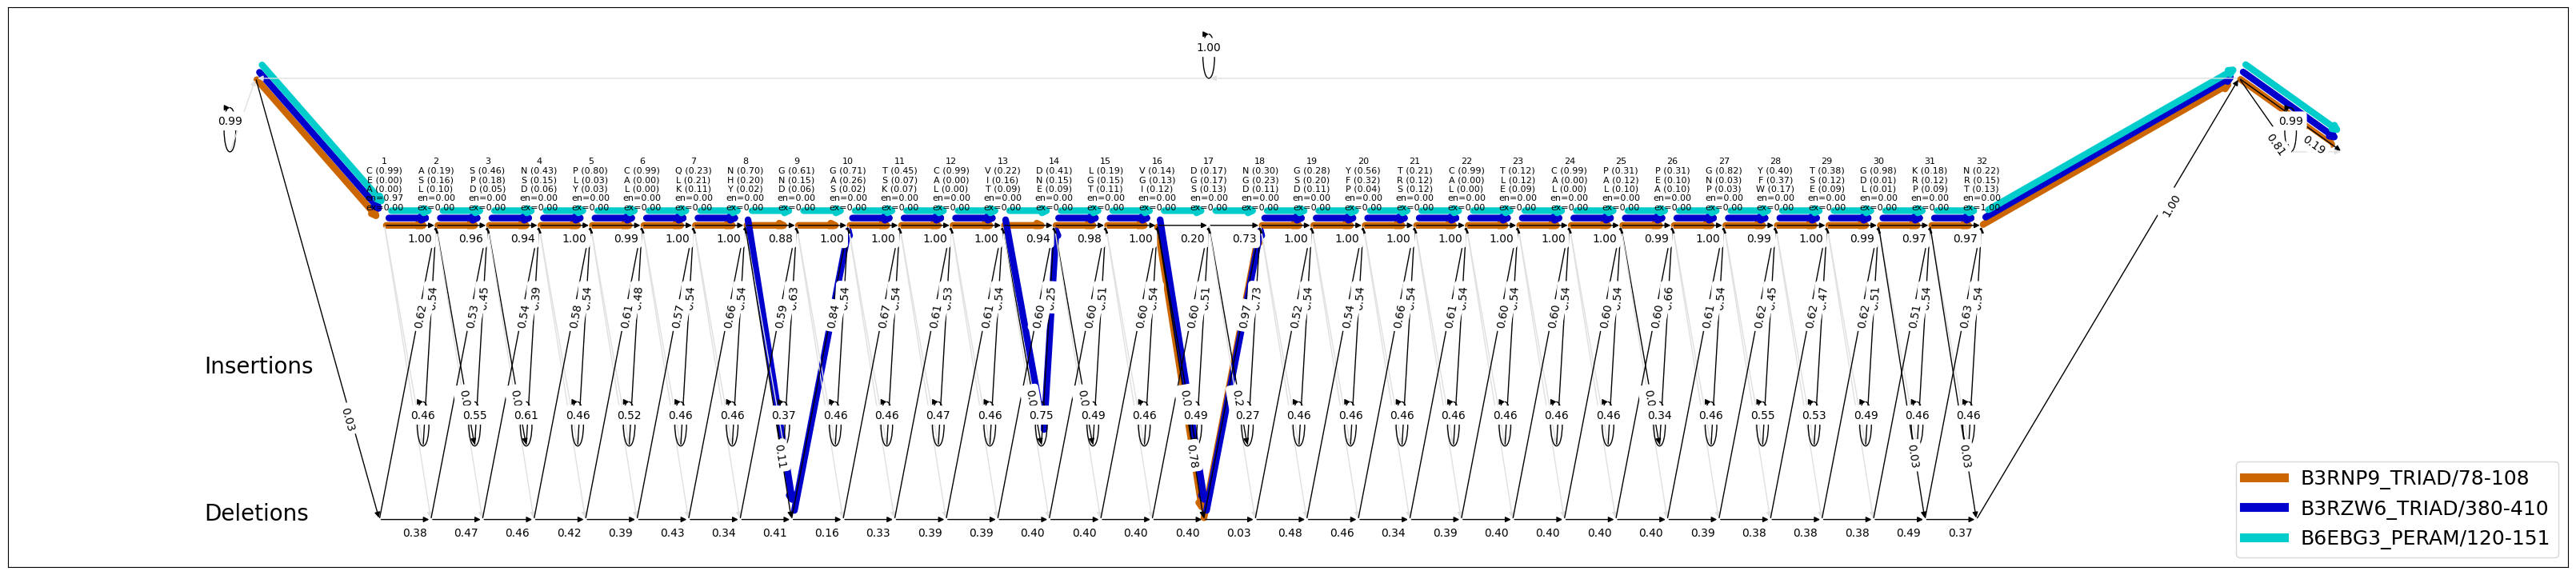

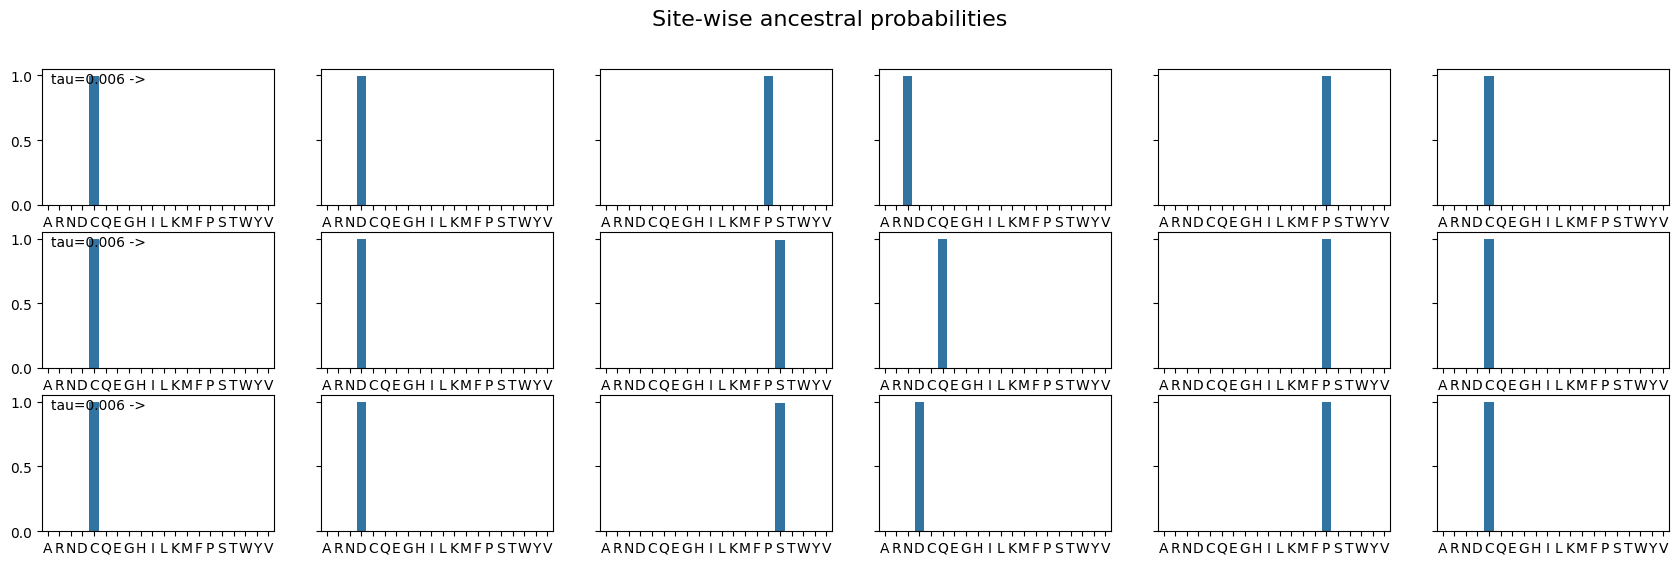

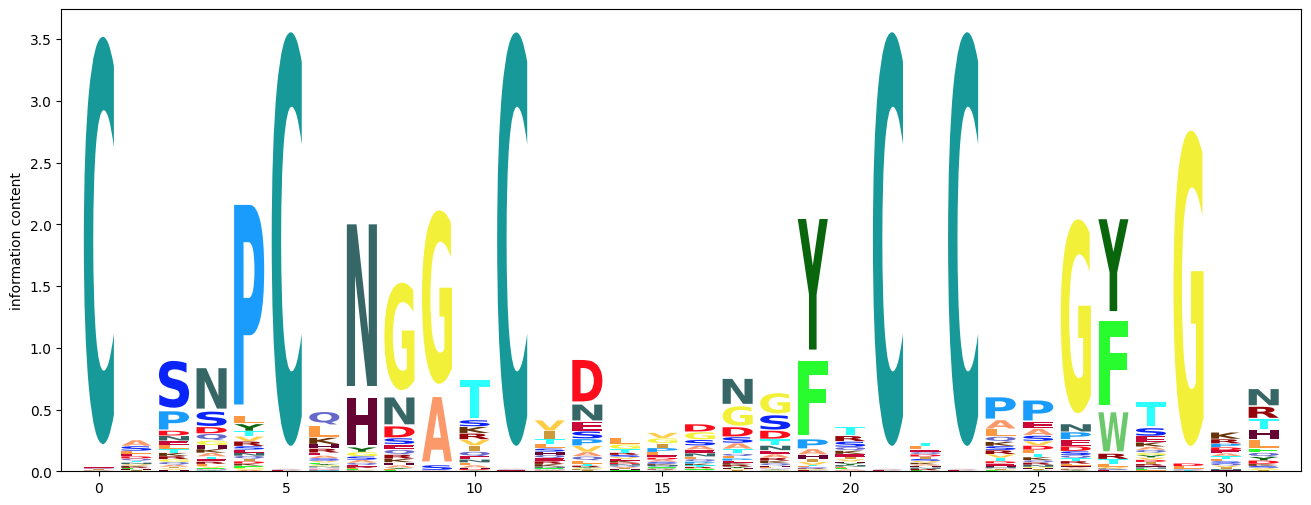

In [7]:
out_filename = "tmp/interactive2.alignment.fasta"

# Set up the configuration including the language model configuration
# Default settings are recommended
scoring_model_config = Common.ScoringModelConfig()
config = Configuration.make_default(
    num_models,
    use_language_model=True,
    scoring_model_config=scoring_model_config
)

# We have to define a model- and batch generator suitable to handle embeddings
model_gen = EmbeddingBatchGenerator.make_generic_embedding_model_generator(
    scoring_model_config.dim
)
batch_gen = EmbeddingBatchGenerator.EmbeddingBatchGenerator(
    scoring_model_config
)

with SequenceDataset(train_filename, fmt="fasta") as data:

    # Comment the next line out to disable cropping
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens)))

    # Compute sequence weights
    sequence_weights = Align.compute_sequence_weights(
        train_filename, "tmp", config["cluster_seq_id"]
    )

    # Align and decode
    alignment_model = Align.run_learnMSA(
        data,
        out_filename,
        config,
        model_generator=model_gen,
        batch_generator=batch_gen,
        sequence_weights=sequence_weights,
        verbose=True,
        align_insertions=True,
    )

    # Visualize the results
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)